In [23]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats,signal
from scipy.stats import poisson,rayleigh
from scipy.signal import convolve
import numpy

# Problem 1 

A

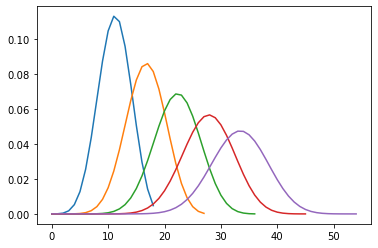

In [24]:
mu = 6
fig, ax = plt.subplots(1, 1)
x = np.arange(0,10)
days = 5
pmf=poisson.pmf(x, mu)
for i in range(days):
    pmf=scipy.signal.convolve(pmf,poisson.pmf(x, mu))
    ax.plot(pmf)

B

According to the graph, we can tell that at day 6, it is still a poisson distribution.Since the gamma ray should be in that certain distribution regardless what day we observe it. 

C

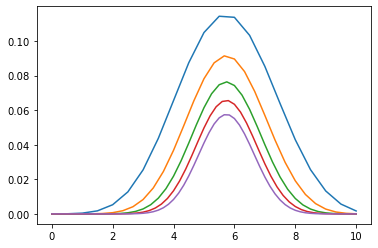

In [25]:
mu = 6
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.poisson.pmf(x,mu)
days = 5
new_pmf=pmf
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
    ax.plot(x, new_pmf)

C

In [ ]:
The shape of the graph is approaching the Gaussian distribution due to the central limit theorem.

D

In [27]:
p_30 = 1-stats.poisson.cdf(30,25)
print(p_30)
Z = abs(stats.norm.ppf(p_30))
print(Z)
sigma = (30-25)/Z
print('sigma is '+ str(sigma))

0.1366911308473363
1.0953067719494647
sigma is 4.564931148102762


# problem 2

A

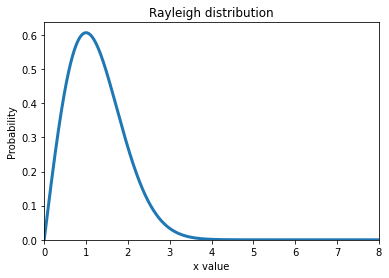

In [9]:
scale = 1
dist = stats.rayleigh(scale=scale)
x = np.linspace(0, 8, 1000)
plt.title(f"Rayleigh distribution")
plt.xlabel("x value")
plt.ylabel("Probability")
plt.plot(x, dist.pdf(x), linewidth=3)
plt.xlim(0, 8)
plt.xticks(range(0, 9))
plt.ylim(0, None);

B

rayleigh distribution 

(5.0, 9.0)

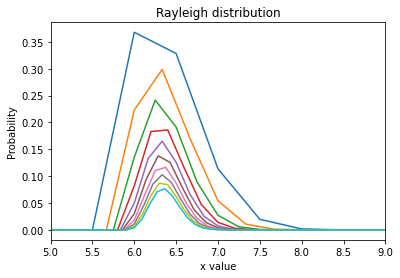

In [34]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.rayleigh.pdf(x,mu)
days = 10
new_pmf=pmf
plt.title(f"Rayleigh distribution")
plt.xlabel("x value")
plt.ylabel("Probability")
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
    ax.plot(x, new_pmf)
plt.xlim(5, 9)

with 200 testing days 

(5.0, 9.0)

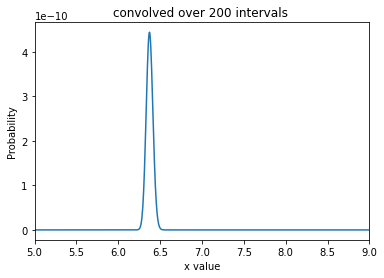

In [35]:
mu = 5
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,11)
pmf = stats.rayleigh.pdf(x,mu)
days = 200
new_pmf=pmf
plt.title(f"convolved over 200 intervals ")
plt.xlabel("x value")
plt.ylabel("Probability")
for i in range(days):
    day = i+1
    new_pmf = scipy.signal.convolve(new_pmf, pmf)
    x = np.linspace(0,10*(i+2),10*(i+2)+1)/(day+1)
ax.plot(x, new_pmf)
plt.xlim(5, 9)

problem 3 

version 1:

Pick X as 2.34*sqrt(sigma) and Y as 3.45 with standard deviation of 0.5

Sigma: 6.899999160917928
Probability2.6001423236721166e-12
since the sigma value is greater than 5,we can claim a discovery


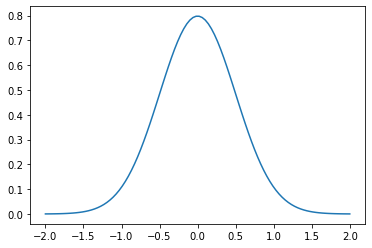

In [37]:
sigma=0.5
X = 2.34*np.sqrt(0.5)
ax = np.linspace(-2,2,100)
Y = 3.45
gr = stats.norm.pdf(ax,0,sigma)
pro = 1-stats.norm.cdf(Y,0,sigma)
Sigma_5 = stats.norm.ppf(1-pro)
print('Sigma: '+ str(Sigma_5))
print('Probability' + str(pro))
print('since the sigma value is greater than 5,we can claim a discovery')
plt.plot(ax,gr)

version 2

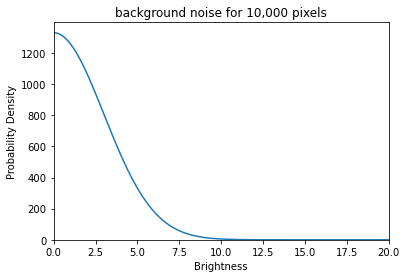

In [40]:
dist = stats.norm(scale=3)
x = np.linspace(0, 20, 1000)
plt.title("background noise for 10,000 pixels")
plt.xlabel("Brightness")
plt.ylabel("Probability Density")
plt.plot(x, 10_000 * dist.pdf(x))
plt.xlim(0, 20)
plt.ylim(0, None);

In [41]:
prob = 10_000 * dist.sf(18.2)
print(prob)

6.529609989961204e-06


In [44]:
stats.norm.ppf(1 - prob)

4.359110439651986

which is less than 5

problem 4 

A

let's get probability for 5 sigma first 

In [46]:
prob = stats.norm.sf(5)
print(prob)

2.866515718791933e-07


In [47]:
thres_1 = dist.ppf(1 - prob)
print(thres_1)

14.999999999910528


so 5 sigma detection will result a signal threshold about 15

B

In [49]:
new_prob = prob / 10_000
thres_2 = dist.ppf(1 - new_prob)
print(thres_2)

19.651612460674965


In [50]:
print(thres_2 / thres_1)

1.3101074973861455


so the signal should be about 31% brighter than before 

C

In [51]:
dist.sf(thres_2) / dist.sf(thres_1)

0.00010000008423938025

we can tell that the chance is very low 

D

In [52]:
sig_1000000000=stats.norm.ppf(1-prob/1000000000,0,0.5)
sig_1000000000

4.038285502065062

extra

Even if we had a different distibution shape, as we have many trials it would become a Gaussian over time. So the sensitivity penalty for many trials would be smaller as well